In [52]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
# from wordcloud import WordCloud

In [53]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [54]:
# drop unnecessary column
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)


In [55]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
#rename the collumn sth better v1 as label and v2 as data
df.columns=['labels','data']

In [57]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

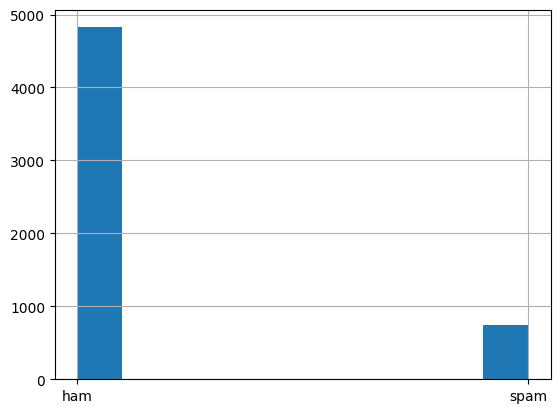

In [58]:
df['labels'].hist()
# this show that our class is imbalance as ham is much larger that spam

In [59]:
# create binary labels as ham=0 and spam=1
# so that we can feet data inlo ml algo
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].to_numpy()
print(Y)

[0 0 1 ... 0 0 0]


In [60]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(
    df['data'], Y, test_size=0.33)
print(df_train)

2280                          R Ì_ comin back for dinner?
644     Allo! We have braved the buses and taken on th...
565     Ill call u 2mrw at ninish, with my address tha...
4972    Oops I was in the shower when u called. Hey a ...
4864             I'm really sorry I lit your hair on fire
                              ...                        
3348                               Oh is it! Which brand?
3361         No messages on her phone. I'm holding it now
2432    Really dun bluff me leh... U sleep early too. ...
1378                            Ya tel, wats ur problem..
341     I take it the post has come then! You must hav...
Name: data, Length: 3733, dtype: object


In [61]:
featurize=CountVectorizer(decode_error='ignore') #if any invalid utf char come then it simply ignore
Xtrain=featurize.fit_transform(df_train) 
Xtest=featurize.transform(df_test)
# print(Xtrain)
# print(Xtest)

In [62]:
Xtrain

<3733x6988 sparse matrix of type '<class 'numpy.int64'>'
	with 49418 stored elements in Compressed Sparse Row format>

In [63]:
modle=MultinomialNB()
modle.fit(Xtrain,Ytrain)
print("this is train accuracy ",modle.score(Xtrain,Ytrain))
print("this is test accuracy",modle.score(Xtest,Ytest))

this is train accuracy  0.994106616662202
this is test accuracy 0.9853181076672104


In [64]:
Ptrain = modle.predict(Xtrain)
print(Ptrain)
Ptest = modle.predict(Xtest)
print(Ptest)
print("train F1:", f1_score(Ytrain, Ptrain))
print("test F1:", f1_score(Ytest, Ptest))

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
train F1: 0.9776422764227642
test F1: 0.9452332657200813


In [72]:
Prob_train = modle.predict_proba(Xtrain)[:,1]
Prob_test = modle.predict_proba(Xtest)[:,1]
print("train AUC:", roc_auc_score(Ytrain, Prob_train))
print("test AUC:", roc_auc_score(Ytest, Prob_test))

train AUC: 0.9915377006485864
test AUC: 0.9826560520628929


In [66]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[3230,   10],
       [  12,  481]], dtype=int64)

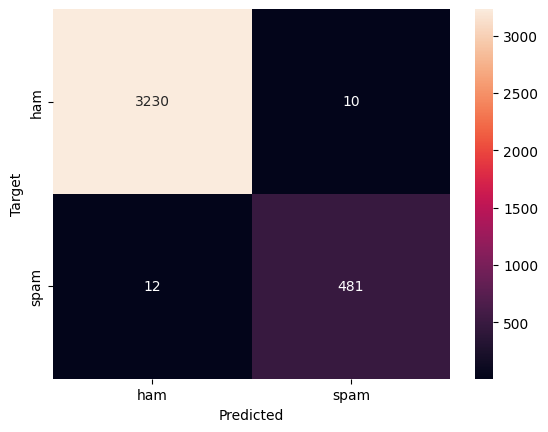

In [67]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)


In [68]:
# see what we're getting wrong
X = featurize.transform(df['data'])
df['predictions'] = modle.predict(X)
df['predictions']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: predictions, Length: 5572, dtype: int64

In [69]:
# things that should be spam but it not considered as spam 
# these are also contain ham and spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
For sale - arsenal dartboard. Good condition but no doubles or trebles!
Hi its LUCY Hubby at meeti